In [1]:
import pandas as pd
import numpy as np

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

skmlfsd

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# changing column names to more informative ones
df.columns = ['age', 'isMale', 'cp', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
              'maximum_heart_rate', 'exercise_induced_angina', 'old_peak', 'slope', 'major_vessels', 
              'thal', 'heart_disease']

In [7]:
# changing column names to more informative ones
df.columns = ['age', 'isMale', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
              'maximum_heart_rate', 'exercise_induced_angina', 'old_peak', 'slope', 'major_vessels', 
              'thal', 'heart_disease']

In [11]:
df.columns

Index(['age', 'isMale', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'maximum_heart_rate',
       'exercise_induced_angina', 'old_peak', 'slope', 'major_vessels', 'thal',
       'heart_disease'],
      dtype='object')

In [12]:
df.isnull().values.any()

False

In [13]:
df.describe()

,age,isMale,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,old_peak,slope,major_vessels,thal,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# turning categorical data into dummy variables.

a = pd.get_dummies(df['chest_pain_type'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.columns

Index(['age', 'isMale', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'maximum_heart_rate',
       'exercise_induced_angina', 'old_peak', 'slope', 'major_vessels', 'thal',
       'heart_disease', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [15]:
df = df.drop(columns = ['chest_pain_type', 'thal', 'thal_0', 'slope'])
# renaming categorical columns
df = df.rename(columns={'cp_0':'typical_angina_pain','cp_1':'atypical_angina_pain','cp_2':'non-anginal_pain','cp_3':'asymptomatic_pain',
                       'slope_0':'upsloping_st', 'slope_1':'flat_st', 'slope_2':'downsloping_st',
                       'thal_1': 'thalassemia_normal', 'thal_2': 'thalassemia_fixed', 'thal_3': 'thalassemia_reversable'})

In [16]:
df

,age,isMale,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_induced_angina,old_peak,major_vessels,...,typical_angina_pain,atypical_angina_pain,non-anginal_pain,asymptomatic_pain,thalassemia_normal,thalassemia_fixed,thalassemia_reversable,upsloping_st,flat_st,downsloping_st
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,0,1,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,0,1,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,0,1,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,0,1,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,1,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,0,1,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,1,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,1,0,0,0,0,0,1,0,1,0


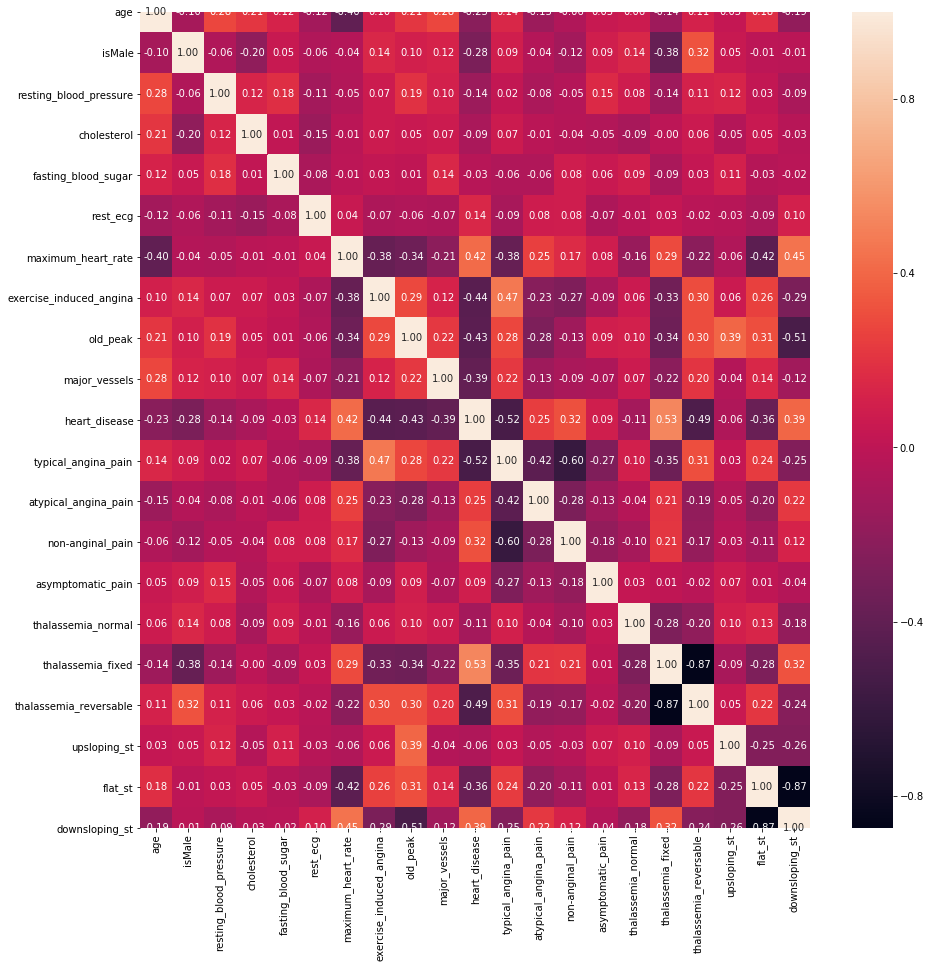

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

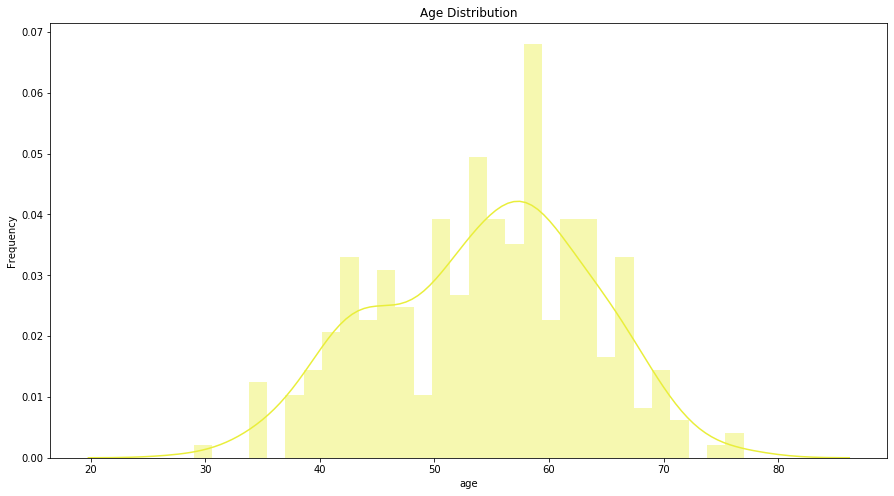

In [26]:
plt.figure(figsize=(15,8))
plt.title('Age Distribution')
plt.ylabel('Frequency')
sns.distplot(df['age'],color='#E9EE3B',bins=30)

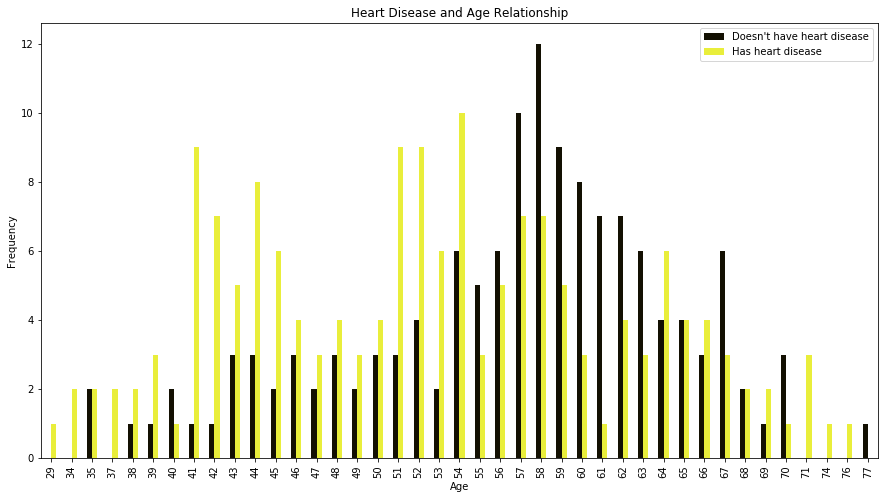

In [27]:
pd.crosstab(df.age,df.heart_disease).plot(kind="bar",figsize=(15,8), color=['#131002','#E9EE3B' ])
plt.title('Heart Disease and Age Relationship')
plt.legend(["Doesn't have heart disease", "Has heart disease"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

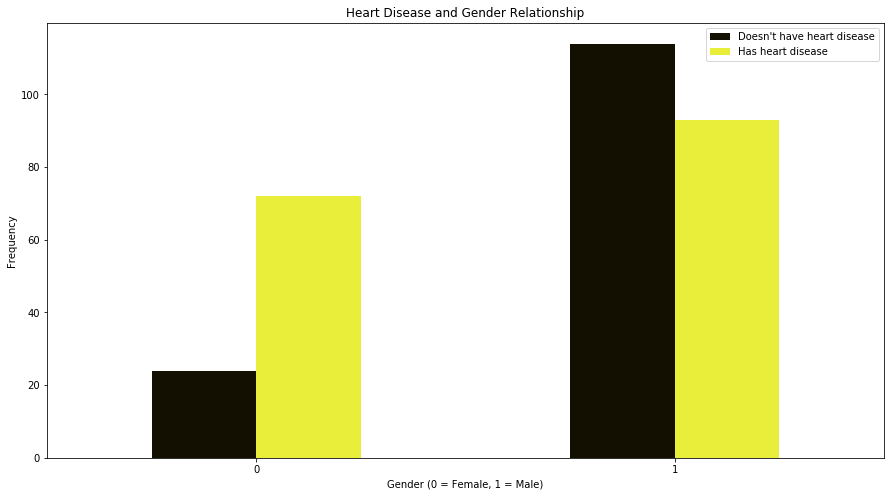

In [28]:
pd.crosstab(df.isMale,df.heart_disease).plot(kind="bar",figsize=(15,8), color=['#131002','#E9EE3B'])
plt.title('Heart Disease and Gender Relationship')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Doesn't have heart disease", "Has heart disease"])
plt.ylabel('Frequency')
plt.show()